## Học phần: Thị giác máy tính
#### Nhóm 9: 
- Trịnh Quốc Dân - 22E1020014
- Lê Quý Minh Quang - 22E1020007
- Phạm Phước Bảo Tín - 22E1020021

## Mô tả dữ liệu
- Bộ dữ liệu về phân loại "Shoe", "Sandal", "Boot". Nguồn dữ liệu : Kaggle ([Shoe vs Sandal vs Boot Image Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images?fbclid=IwZXh0bgNhZW0CMTEAAR4Qhm5prfJKpfYH3kwbWi-Tcsk1Q1AHnBqh4scpOWhT4CTERDLwisuTuvNcDg_aem_8fGVUmMtZuHu_Cmj3jxaCg)).
- Ba lớp 3 thư mục riêng, mỗi thư mục 5000 ảnh.


## Chuẩn bị dữ liệu

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd
IMG_SIZE = 120  # resize ảnh kích thước 120x120

X = []
y = []

img_size = (120, 120)
data_dir =r"D:\datasets\ShoeSandalBoot"
classes = ["Shoe", "Sandal", "Boot"]
for label, c in enumerate(classes):
    folder = os.path.join(data_dir, c)
    for img_file in os.listdir(folder)[:200]:  # lấy 50 ảnh cho nhẹ
        img = load_img(os.path.join(folder, img_file), target_size=img_size)
        arr = img_to_array(img).flatten() / 255.0
        X.append(arr)
        y.append(c)  # dùng tên class thay vì số cho dễ đọc

X = np.array(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_2d, columns=["Feature 1", "Feature 2"])
df["Target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Feature 1", y="Feature 2",
    hue="Target", palette="tab10", legend="full", s=70
)
plt.title("Shoes vs Sandal vs Boot (PCA 2D Projection)")
plt.grid(True)
plt.show()


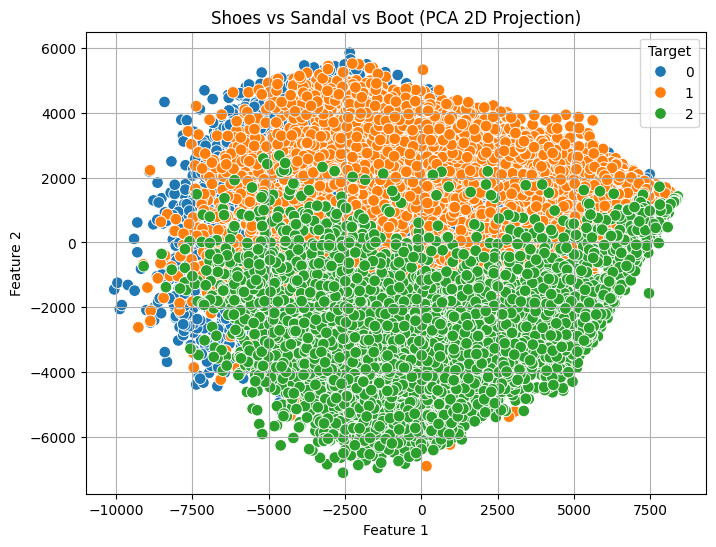

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

df = pd.DataFrame(X_2d, columns=["Feature 1", "Feature 2"])
df["Target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Feature 1", y="Feature 2",
    hue="Target", palette="tab10", legend="full", s=70
)
plt.title("Shoes vs Sandal vs Boot (PCA 2D Projection)")
plt.grid(True)
plt.show()

## Theo dõi k 

k=1, Accuracy=0.9043
k=3, Accuracy=0.9003
k=5, Accuracy=0.8933
k=7, Accuracy=0.8877
k=9, Accuracy=0.8827


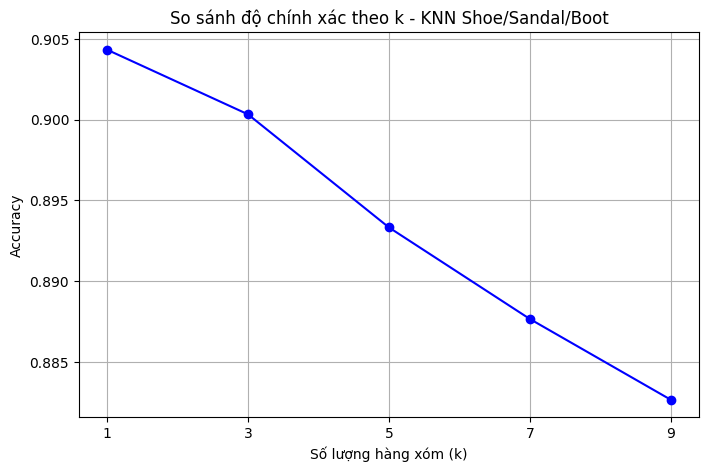

In [ ]:
# 3. So sánh accuracy theo k
# ======================
k_values = range(1, 10, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean", weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.xticks(k_values)
plt.xlabel("Số lượng hàng xóm (k)")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác theo k - KNN Shoe/Sandal/Boot")
plt.grid(True)
plt.show()


Chọn k (từ kết quả thử nghiệm trên)

In [35]:
# ======================
# 3. Huấn luyện KNN
# ======================
k=3
knn_k = KNeighborsClassifier(n_neighbors=k,metric="euclidean",weights='distance')
knn_k.fit(X_train, y_train)

# ======================
# 4. Đánh giá mô hình
# ======================
y_pred = knn_k.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred, target_names=classes))



🔹 Accuracy: 0.9043333333333333

🔹 Classification Report:
               precision    recall  f1-score   support

        Shoe       0.90      0.93      0.91      1000
      Sandal       0.96      0.80      0.87      1000
        Boot       0.87      0.99      0.93      1000

    accuracy                           0.90      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.91      0.90      0.90      3000



Vẽ ma trận nhầm lẫn với K đã chọn

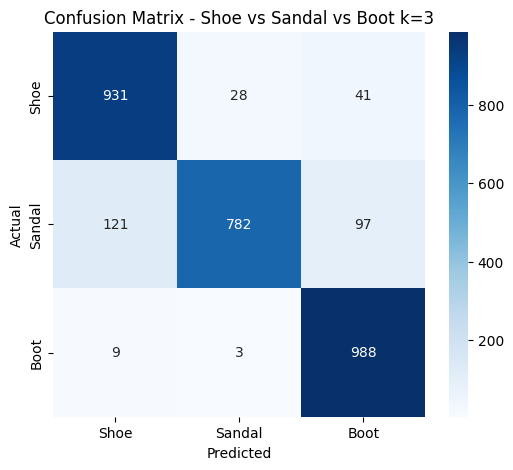

In [34]:
# 5. Ma trận nhầm lẫn
# ======================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Shoe vs Sandal vs Boot k={k}")
plt.show()


## Dự đoán phân loại

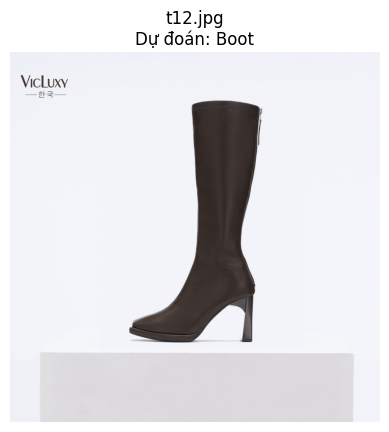

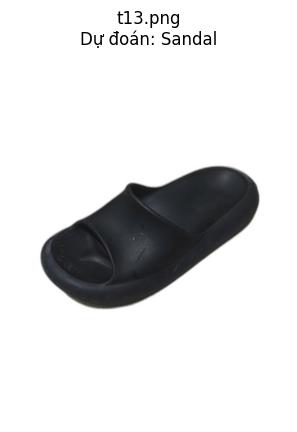

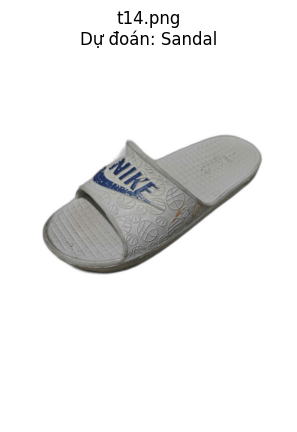

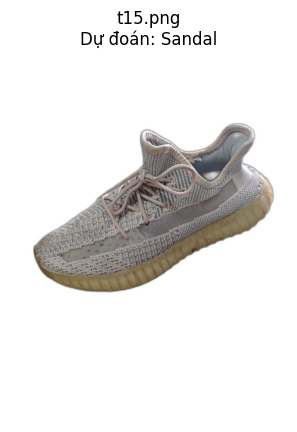

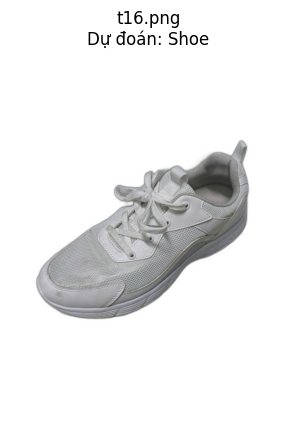

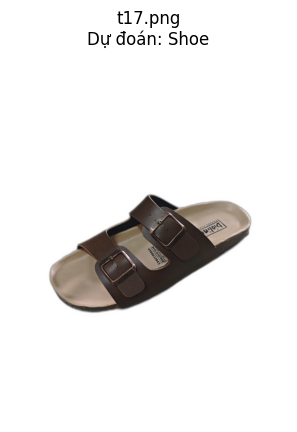

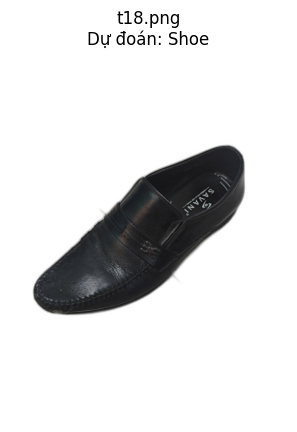

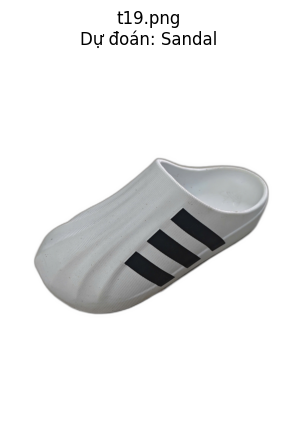

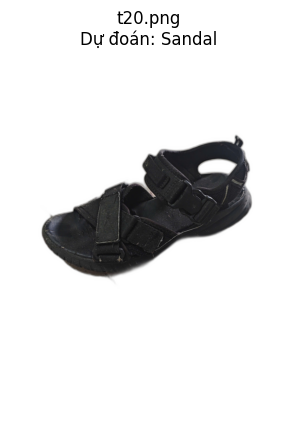

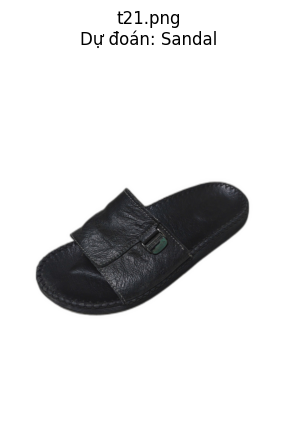

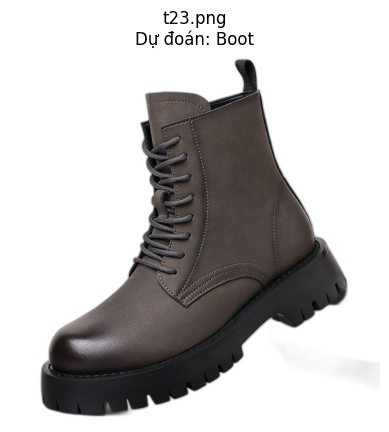

In [39]:
import os
def predict_folder(folder_path, limit=10):
    results = []
    count = 0
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        # Ảnh gốc để hiển thị (giữ nguyên màu và kích thước)
        img_original = cv2.imread(img_path)
        if img_original is None:
            continue
        img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) 

        # Ảnh xử lý để dự đoán
        img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))
        img_flat = img_resized.flatten().reshape(1, -1)
        img_scaled = scaler.transform(img_flat)
        prediction = knn_k.predict(img_scaled)[0]

        results.append((filename, classes[prediction]))

        # Hiển thị ảnh gốc + nhãn dự đoán
        plt.imshow(img_rgb)
        plt.title(f"{filename}\nDự đoán: {classes[prediction]}")
        plt.axis("off")
        plt.show()

        # print(f"{filename} → {classes[prediction]}")

        count += 1
        if limit and count >= limit:  # giới hạn số ảnh hiển thị
            break
    
    return results

# Ví dụ: dự đoán toàn bộ ảnh trong thư mục test
test_dir = r"D:\datasets\test_dan"
results = predict_folder(test_dir, limit=18)  # hiển thị thử 5 ảnh đầu
